In [1]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#loading the Digit MNIST dataset
data = keras.datasets.mnist

(train_images, train_labels) , (test_images, test_labels) = data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [6]:
#Printing any sample image
print(train_images[3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [0]:
# shrinking the values to 0-1 from 0-255

train_images = train_images/255.0
test_images = test_images/255.0

In [8]:
# printing the shrunk values
print(train_images[3])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

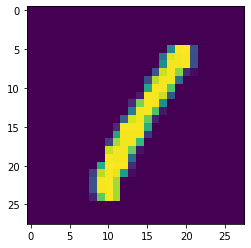

In [12]:
plt.imshow(train_images[3])


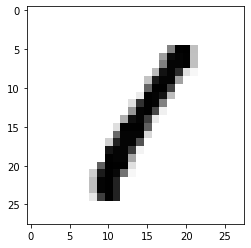

In [13]:
#  converting the images to gray_scale
plt.imshow(train_images[3], cmap=plt.cm.binary)

In [20]:
#deep learning model

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          
                          keras.layers.Dense(128, activation = "relu"),
                          keras.layers.Dropout(0.1),

                          keras.layers.Dense(64, activation = "relu"),
                          keras.layers.Dropout(0.1),

                          keras.layers.Dense(10, activation = "softmax")
])

model.compile(optimizer = 'adam', loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.fit(train_images, train_labels, epochs = 20, batch_size = 200, validation_split = 0.1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 42us/sample - loss: 0.4775 - acc: 0.8601 - val_loss: 0.1584 - val_acc: 0.9563
Epoch 2/20
54000/54000 [==============================] - 2s 37us/sample - loss: 0.1946 - acc: 0.9425 - val_loss: 0.1132 - val_acc: 0.9675
Epoch 3/20
54000/54000 [==============================] - 2s 37us/sample - loss: 0.1404 - acc: 0.9574 - val_loss: 0.0943 - val_acc: 0.9728
Epoch 4/20
54000/54000 [==============================] - 2s 36us/sample - loss: 0.1145 - acc: 0.9659 - val_loss: 0.0824 - val_acc: 0.9762
Epoch 5/20
54000/54000 [==============================] - 2s 37us/sample - loss: 0.0958 - acc: 0.9711 - val_loss: 0.0739 - val_acc: 0.9790
Epoch 6/20
54000/54000 [==============================] - 2s 36us/sample - loss: 0.0823 - acc: 0.9742 - val_loss: 0.0799 - val_acc: 0.9767
Epoch 7/20
54000/54000 [============

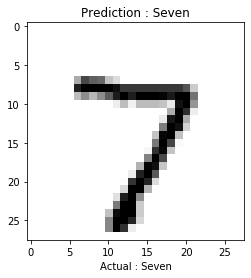

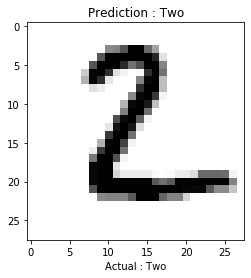

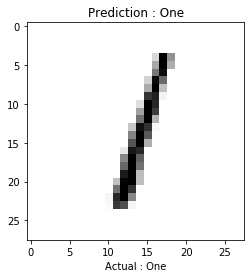

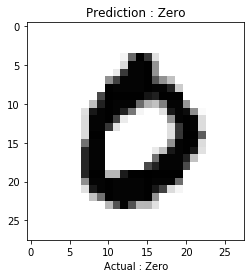

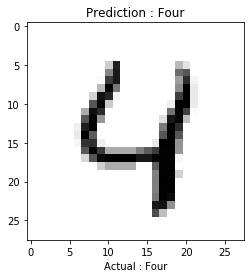

In [21]:
#prediction 
prediction = model.predict(test_images)

for i in range(5):
  plt.grid(False)
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  plt.title("Prediction : " + class_names[np.argmax(prediction[i])])
  plt.xlabel("Actual : " + class_names[test_labels[i]])
  plt.show()